In [57]:
import PIL, PIL.ImageFont, PIL.Image, PIL.ImageDraw, PIL.ImageChops, PIL.ImageOps
import os
import random
import string
import numpy
import sys
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
w, h = 64, 64
w0, h0 = 256, 256

In [54]:
chars = string.ascii_letters + string.digits + string.punctuation
print(chars)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
def get_ttfs(d='scraper/fonts'):
    for dirpath, dirname, filenames in os.walk(d):
        for filename in filenames:
            if filename.endswith('.ttf') or filename.endswith('.otf'):
                yield os.path.join(dirpath, filename)

In [74]:
def read_font(fn):
    # loads a font object
    font = PIL.ImageFont.truetype(fn, min(w0, h0))
    print(font)

#     # We need to make sure we scale down the fonts but preserve the vertical alignment
#     min_ly = float('inf')
#     max_hy = float('-inf')
#     max_width = 0
#     imgs = []

    for char in chars:
        print ('...', char)
        # Draw character
        img = PIL.Image.new("L", (w0*5, h0*3), 255) # "L" = 8bit pixels B+W, 255 is for white background
        draw = PIL.ImageDraw.Draw(img)
        draw.text((w0, h0), char, font=font)

        # Get bounding box
        diff = PIL.ImageChops.difference(img, blank)
        lx, ly, hx, hy = diff.getbbox()
        min_ly = min(min_ly, ly)
        max_hy = max(max_hy, hy)
        max_width = max(max_width, hx - lx)
        imgs.append((lx, hx, img))

#     print ('crop dims:', max_hy - min_ly, max_width)
#     scale_factor = min(1.0 * h / (max_hy - min_ly), 1.0 * w / max_width)
#     data = []

#     for lx, hx, img in imgs:
#         img = img.crop((lx, min_ly, hx, max_hy))

#         # Resize to smaller
#         new_width = (hx-lx) * scale_factor
#         new_height = (max_hy - min_ly) * scale_factor
#         img = img.resize((int(new_width), int(new_height)), PIL.Image.ANTIALIAS)

#         # Expand to square
#         img_sq = PIL.Image.new('L', (w, h), 255)
#         offset_x = (w - new_width)/2
#         offset_y = (h - new_height)/2
#         print (offset_x, offset_y)
#         img_sq.paste(img, (int(offset_x), int(offset_y)))

#         # Convert to numpy array
#         matrix = numpy.array(img_sq.getdata()).reshape((h, w))
#         matrix = 255 - matrix
#         data.append(matrix)

#     return numpy.array(data)

In [75]:
for fn in get_ttfs(d = '/Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf'):#(d=sys.argv[1]):
    print (fn)
    data = read_font(fn)
    
    print(data.shape)
    break
# print('test')
plt.imshow(data[30,:,:])

/Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
... a
... b
... c
... d
... e
... f
... g
... h
... i
... j
... k
... l
... m
... n
... o
... p
... q
... r
... s
... t
... u
... v
... w
... x
... y
... z
... A
... B
... C
... D
... E
... F
... G
... H
... I
... J
... K
... L
... M
... N
... O
... P
... Q
... R
... S
... T
... U
... V
... W
... X
... Y
... Z
... 0
... 1
... 2
... 3
... 4
... 5
... 6
... 7
... 8
... 9
... !
... "
... #
... $
... %
... &
... '
... (
... )
... *
... +
... ,
... -
... .
... /
... :
... ;
... <
... =
... >
... ?
... @
... [
... \
... ]
... ^
... _
... `
... {
... |
... }
... ~


AttributeError: 'NoneType' object has no attribute 'shape'

In [34]:
os.walk(sys.argv[1])

<generator object walk at 0x1099d1db0>

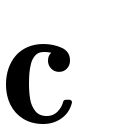

In [435]:
font = ImageFont.truetype("/Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf", 175)

# We need to make sure we scale down the fonts but preserve the vertical alignment
min_ly = float('inf')
max_hy = float('-inf')
max_width = 0

sx, sy = 128, 128
from PIL import ImageFont, ImageDraw
image = PIL.Image.new("L", (sx, sy), 255)
# img = image
draw = ImageDraw.Draw(image)
# draw = PIL.ImageDraw.Draw(image)
draw.text((0, 0), 'c', font=font)

image

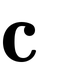

In [378]:
image2 = image.resize((64, 64), PIL.Image.ANTIALIAS)
image2

In [379]:
image.getdata?

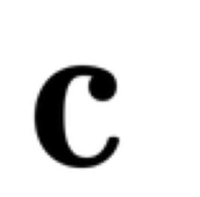

In [427]:
matrix = numpy.array(image2.getdata()).reshape(64,64)
plt.figure(figsize=[3,3])
plt.imshow(matrix,cmap='gray', interpolation = 'hamming')
plt.axis('off');

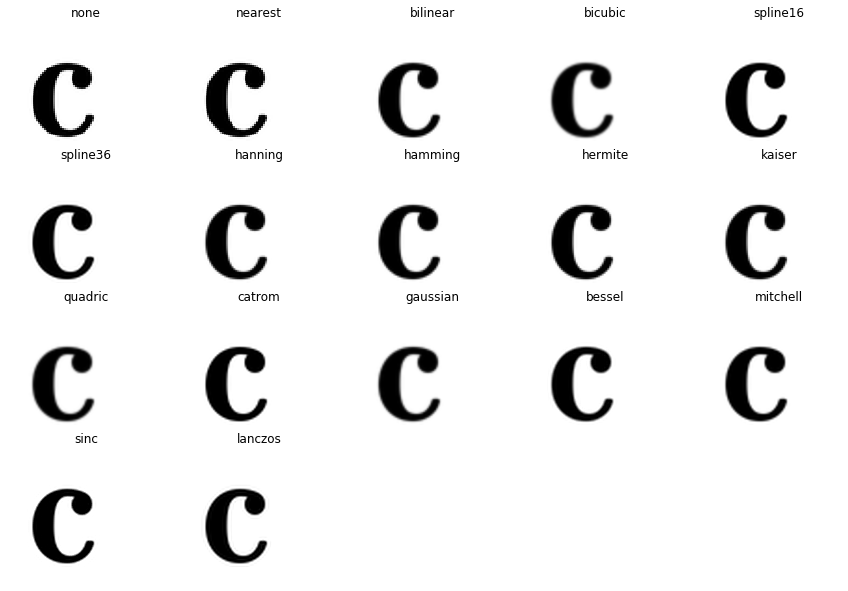

In [434]:
l = ['none', 'nearest', 'bilinear', 'bicubic', 
     'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 
     'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.figure(figsize = [15,10])
for i,t in enumerate(l):
    plt.subplot(4,5,i+1)
    plt.imshow(matrix,cmap='gray', interpolation = t)
    plt.axis('off');
    plt.title(t)

